In [1]:
import numpy as np
import matplotlib.pyplot as plt

import GaussianProcess as gp
import Kernel as k
import GPtrain as gpt
import GPplot as gpp

$$
 p ∼ normal(0.5,0.1) \\
 y ∼ bernoulli(p)
$$

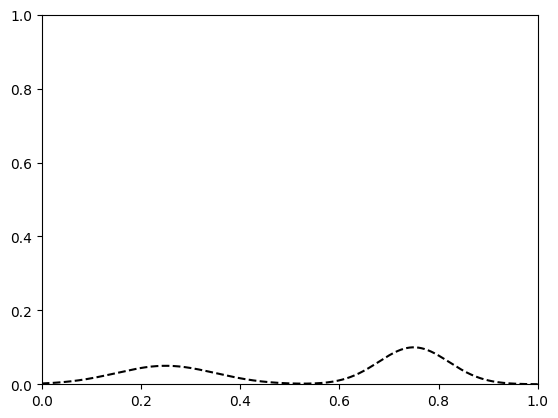

In [2]:
x = np.linspace(0, 1, 1000)
y = gpt.func2(x)[1]
plt.plot(x, y, label='true', linestyle='dashed', color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

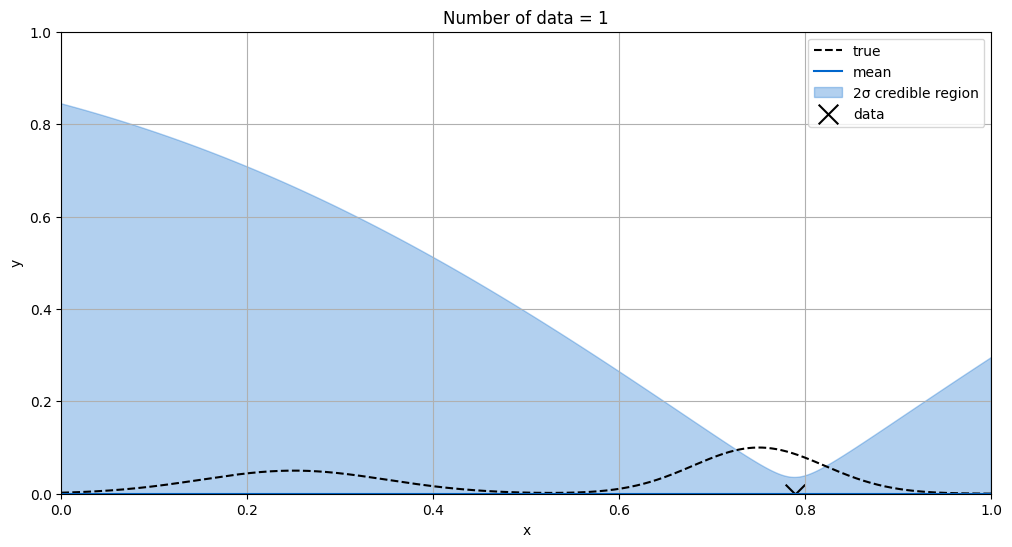

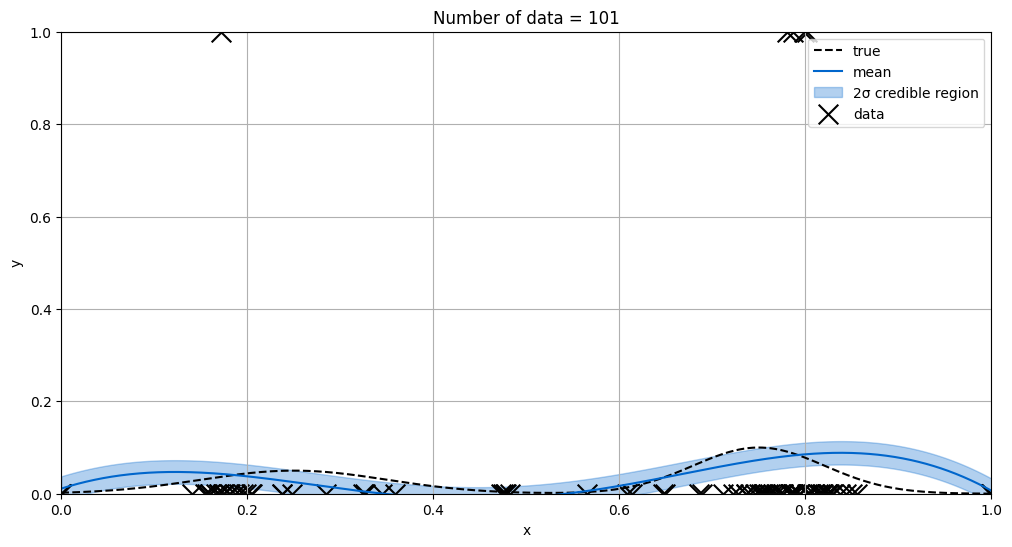

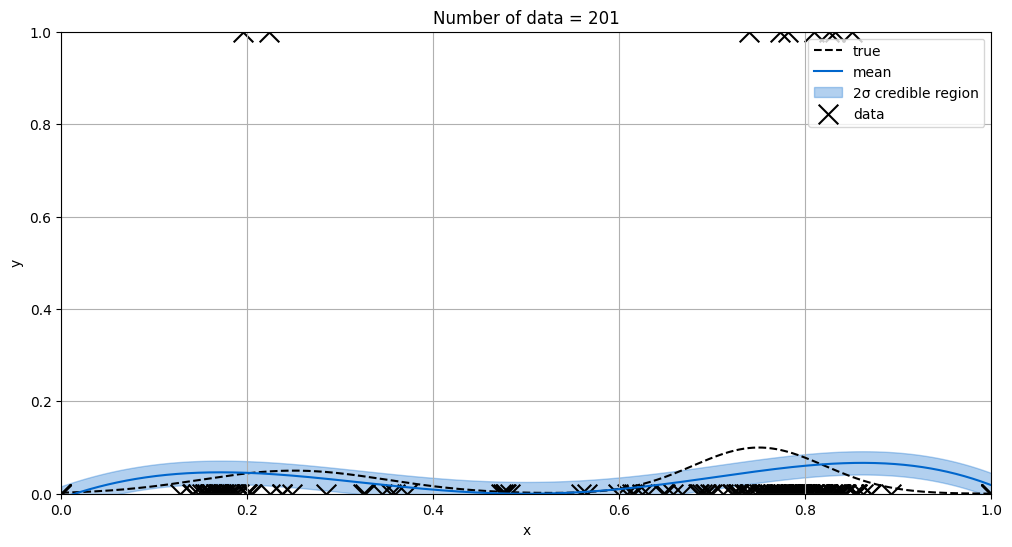

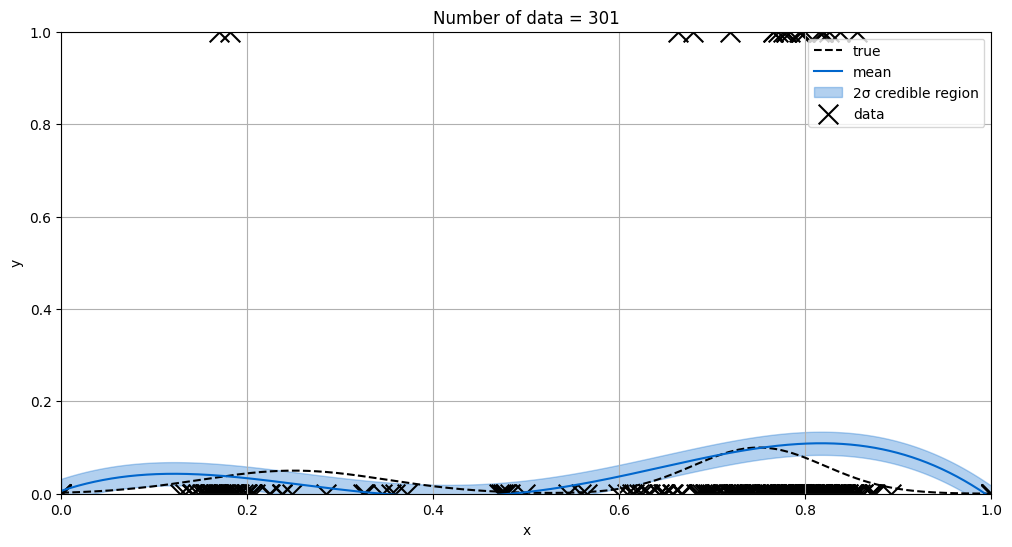

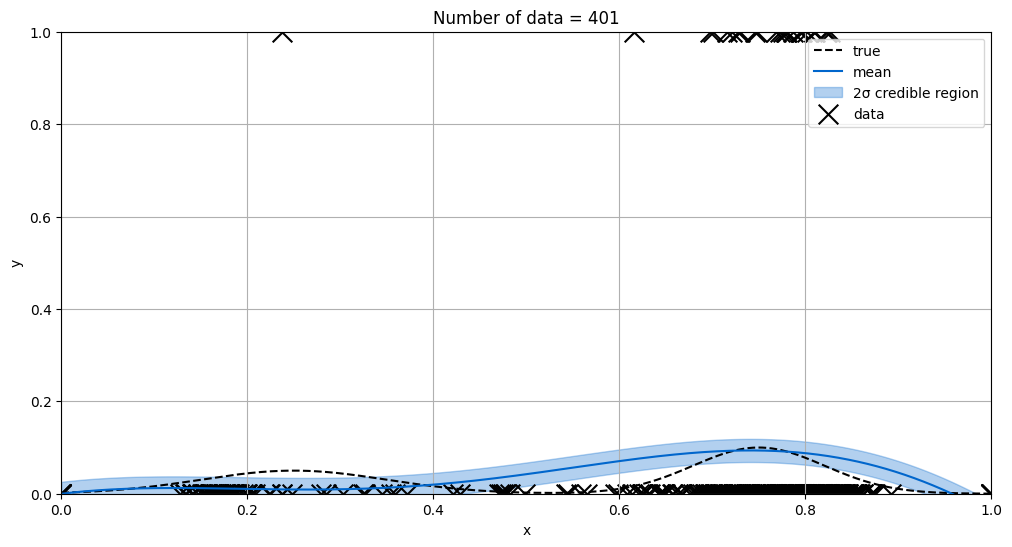

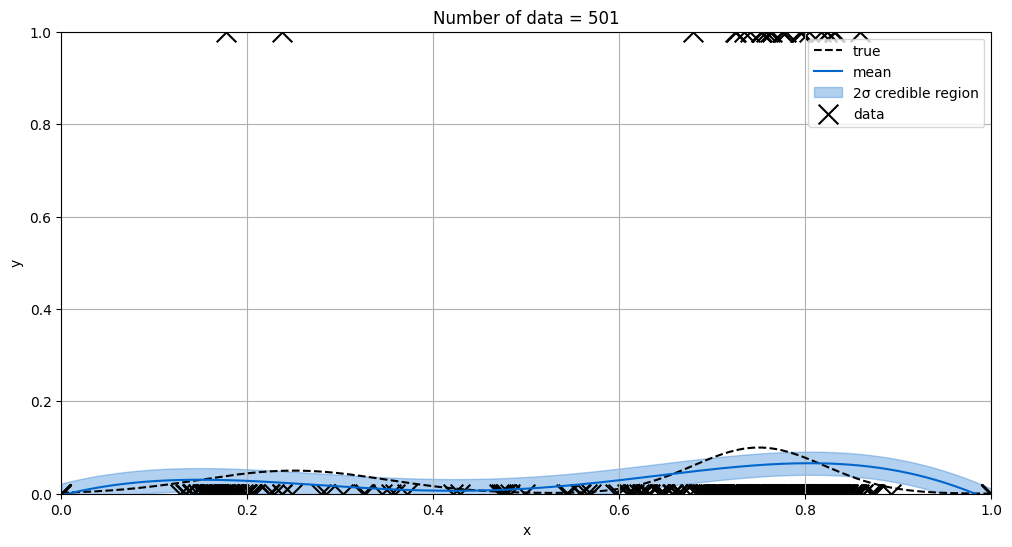

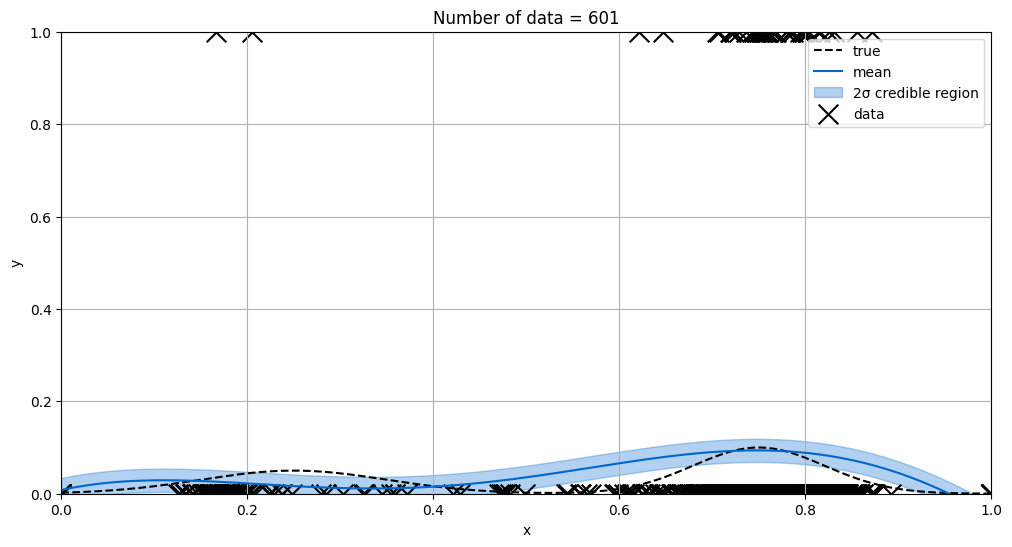

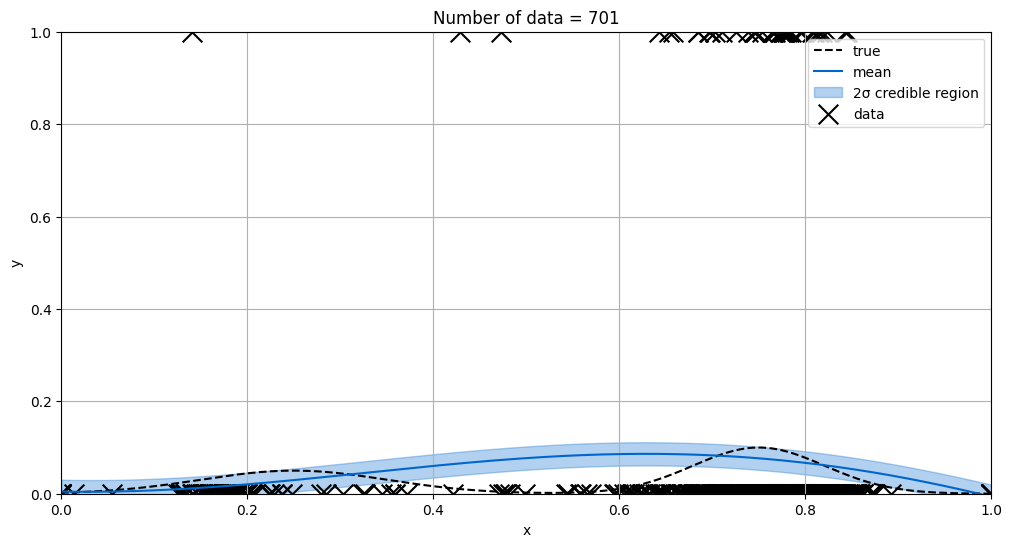

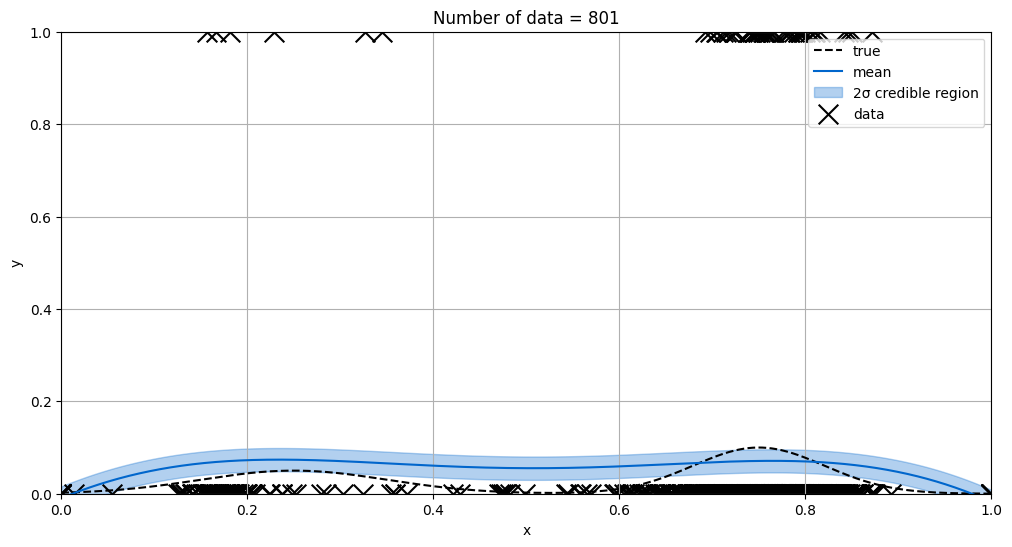

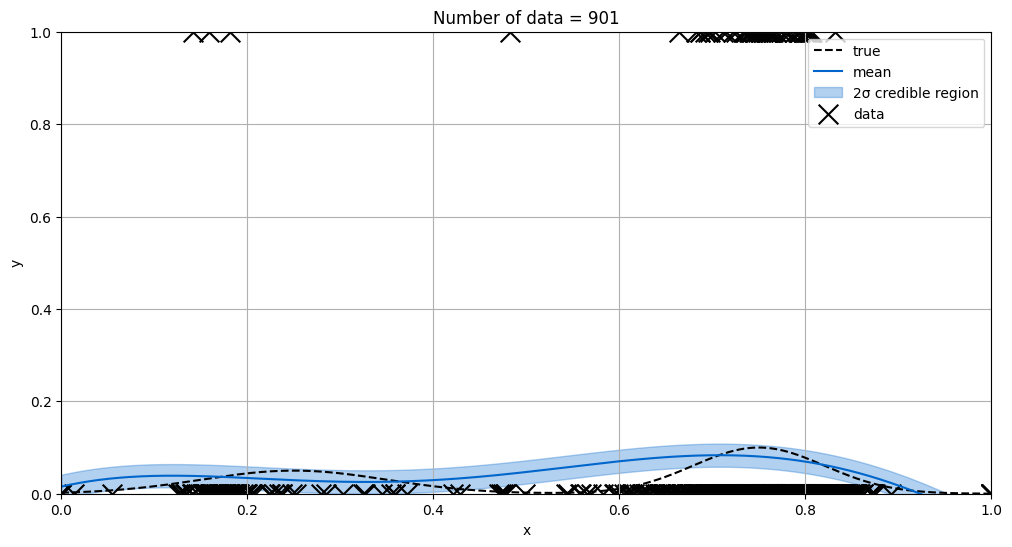

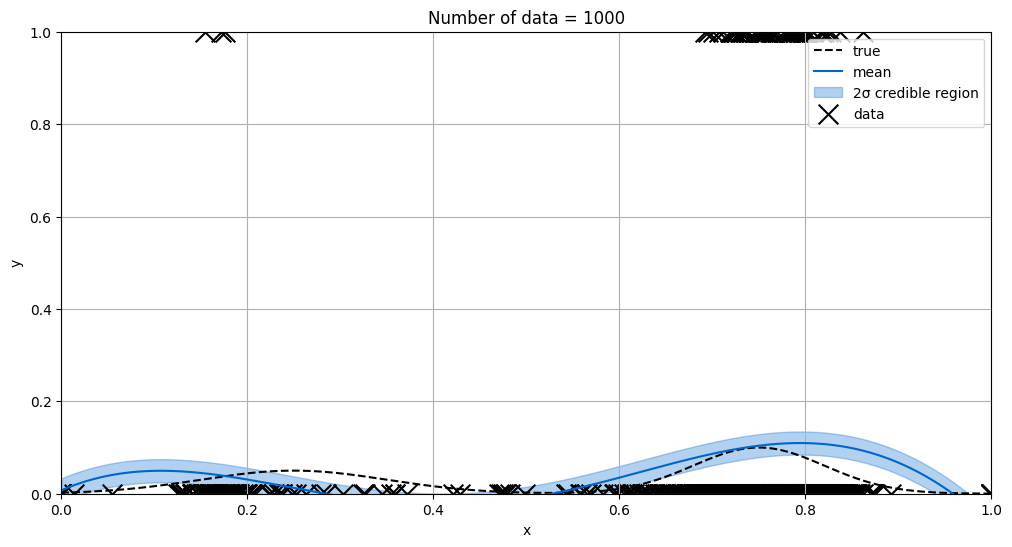

In [3]:
x = np.linspace(0, 1, 1000)
for step in range(1000):

  if step == 0:
    x_train = np.random.random(1)
  else:
    x_train = np.array(list(x_train)+[x[np.argmax(y_mean+y_std)]])
    
  y_train = np.array([gpt.func2(i)[0] for i in x_train])

  GP = gp.GaussianProcess(
    kernel = k.rbf([1,1]),
    sigma = 0.025,
    output_noise = True
  )

  GP.append(x_train, y_train)

  y_mean, y_var = GP.predict(x)
  y_std = np.sqrt(np.maximum(y_var, 0))

  if step%100==0 or step==999:
    gpp.gp_plot(GP, y_mean, y_std,step+1, gpt.func2)

In [4]:
np.sum(y_train)

90

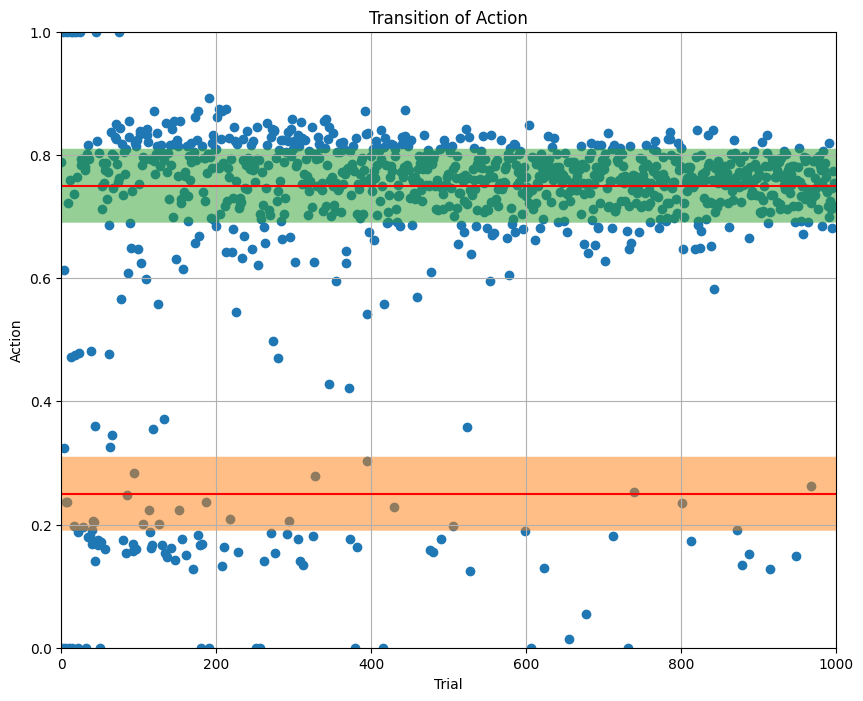

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(range(len(x_train)),x_train)
plt.axhline(0.25,color='red')
plt.axhline(0.75,color='red')
plt.fill_between(np.linspace(0,1000,1000),[0.19 for i in range(1000)],[0.31 for i in range(1000)],alpha=0.5)
plt.fill_between(np.linspace(0,1000,1000),[0.69 for i in range(1000)],[0.81 for i in range(1000)],alpha=0.5)
plt.xlim(0,1000)
plt.ylim(0,1)
plt.grid()
plt.title('Transition of Action')
plt.xlabel('Trial')
plt.ylabel('Action')
plt.show()